---


<img width=25% src="https://raw.githubusercontent.com/gabrielcapela/Credit-Card-Fraud-Detection-/main/images/myself.png" align=right>

# **Health Insurance Cost Prediction Project**

*by Gabriel Capela*

[<img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white"/>](https://www.linkedin.com/in/gabrielcapela)
[<img src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white" />](https://medium.com/@gabrielcapela)

---

**Health insurance** is a contract that covers medical expenses in exchange for an annual fee. It protects you from unexpected medical costs and offers many other benefits.

This project will consist of using individual customer information (age, BMI, whether they are a smoker, etc.) and the annual cost of their health insurance to obtain a model that can indicate an optimal price for health insurance, given the individual's data. For this, several **supervised machine learning models** will be tested, the one that obtains the lowest error rates will be selected and will go through the finetuning process, in order to improve its prediction.
<p align="center">
<img width=50% src="https://github.com/gabrielcapela/AutoML-Projects/blob/main/Regression/images/national-cancer-institute-NFvdKIhxYlU-unsplash.jpg?raw=true">
</p>

The purpose of this project is to apply **Automated Machine Learning**, in order to demonstrate the practicality of this type of tool. The data used was taken from [Kaggle](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction/data).

# Business Understanding 

In the health insurance sector, pricing plans is a **critical challenge** for insurers. The cost of health insurance varies according to several factors, such as age, medical history, lifestyle habits and demographic characteristics of policyholders. Inadequate pricing can lead to financial losses for the company or uncompetitive prices, impacting customer retention and acquisition.

This project seeks to develop a Machine Learning model capable of **accurately predicting health insurance cost**s based on individual characteristics of policyholders. Automating this process, using **AutoML**, allows us to identify hidden patterns in the data and optimize pricing efficiently, reducing errors and increasing transparency in decisions.

The main objectives of this study are:
*   Improving cost predictability – Creating a model capable of estimating insurance costs with a high degree of accuracy.

*   Supporting decision-making – Helping insurers define fairer and more sustainable prices.

*   Exploring the influence of risk factors – Identifying which variables have the most significant impact on insurance costs.

With this data-driven approach, it is expected to not only improve the efficiency of the sector, but also offer customers prices that are more appropriate to their risk profile.

# Data Understanding

The dataset used can be downloaded from this [page](https://github.com/gabrielcapela/AutoML-Projects/blob/main/Regression/insurance.csv)

## Obtaining and Summary Analysis of Data

Let's start by importing the data and previewing the first few rows to illustrate the meaning of each column:

In [44]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/gabrielcapela/AutoML-Projects/refs/heads/main/Regression/insurance.csv')
#Showing the first 5 lines
print(f"The data has {df.shape[0]} rows and {df.shape[1]} variables")
df.head()

The data has 1338 rows and 7 variables


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Below is the meaning of each variable:

* **age**: The age of the insured individual in years.

* **sex**: The gender of the insured individual (male or female).

* **bmi**: Body Mass Index (BMI), a measure of weight relative to height.

* **children**: The number of children covered by the insurance.

* **smoker**: Indicates whether the insured individual is a smoker (yes or no).

* **region**: The geographic region where the insured individual resides.

* **charges**: The total annual health insurance cost (in dollars) for the individual, which is the target variable in this regression model.

## Pandas Profiling

In line with the AutoML philosophy, I will be using **Pandas Profilin**g in the Data Understanding phase of my project. Pandas Profiling **automates the generation of comprehensive Exploratory Data Analysis (EDA) reports**, allowing me to quickly and in-depth understand the dataset, summarizing important statistics, identifying missing values, detecting correlations, and visualizing distributions. The goal of this tool is to **increase productivity and reduce manual effort**, allowing me to focus on interpreting the results instead of performing repetitive EDA tasks.

In [43]:
#Importing the required package
from ydata_profiling import ProfileReport

#Generating the report using Pandas Profiling
profile = ProfileReport(df, explorative=True)

# Saving the report as an HTML file
profile.to_file("insurance_report.html")

# Displaying the report inside a Jupyter Notebook (this doesn't appear on github)
#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Click [**HERE**](https://gabrielcapela.github.io/health_insurance_cost_prediction/insurance_report.html) to see the report

**Some observations** can already be made:

*   The variables **sex**, **smoker** and **region** are categorical, the first two being binary and **region** having four different classes

*   **Charges** is highly overall correlated with **age** and **smoker** 

*   **Children** has 574 (42.9%) zeros, but they are not missing values, they are just people without children.

*   The **Smoker** variable has unbalanced data, around only 20% of the data are positive (smoker).

# Data Preparation

## About PyCaret

**PyCaret** is a Python AutoML library that simplifies the process of building, testing, and optimizing machine learning models. It automates tasks such as model selection, hyperparameter tuning, and performance evaluation, making the workflow faster and more accessible.

For more details, visit [PyCaret](https://pycaret.org).

PyCaret already performs several steps of **data preprocessing automatically**, such as missing value treatment, categorical variable encoding, feature scaling, and outlier detection. Manual preprocessing can sometimes lead to better results, but we will stick to PyCaret’s built-in capabilities to **evaluate the efficiency of AutoM**L.

## Division of data

Although PyCaret already automatically splits the data into training and testing data within the setup() function, choosing to **pre-separate a training set before** delivering it to AutoML can bring important benefits to the reliability and robustness of the model evaluation. One of the benefits, for example, is avoiding data leakage – If the model is optimized based on PyCaret's internal test set, it can indirectly "learn" patterns that it would not have in a real application.
Having an external set for final validation – This allows a more realistic evaluation of the model's performance before putting it into production.

In [80]:
# Separating data into test and training
test = df.sample(frac=0.20)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

print(test.shape)
print(train.shape)

(268, 7)
(1070, 7)


# Modeling

In [47]:
# Importing the necessary packages
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, load_model

## Defining the setup

PyCaret's setup() is the main function for initializing a machine learning experiment. It prepares the data, sets up the pipeline configuration, and applies preprocessing automatically.

In [ ]:
# Creating the PyCaret setup
reg = setup(data=train, target='charges')

,Description,Value
0,Session id,2097
1,Target,charges
2,Target type,Regression
3,Original data shape,"(937, 7)"
4,Transformed data shape,"(937, 10)"
5,Transformed train set shape,"(655, 10)"
6,Transformed test set shape,"(282, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


## Creating the pipeline


The pipeline is an **automated preprocessing and modeling workflow** that ensures that all transformations applied to the training data are replicated on the test data and new predictions.

When we call setup(), PyCaret creates a pipeline that includes steps such as missing value handling, categorical variable encoding, normalization, outlier removal, and feature selection. This pipeline is automatically applied to all trained models, ensuring consistency and **eliminating the need to repeat these steps manually**.

In [81]:
# Creating the pipeline
reg = setup(data = train,
            target = 'charges',
            normalize = True,
            #log_experiment = True,
            experiment_name = 'test_01')

,Description,Value
0,Session id,6256
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 7)"
4,Transformed data shape,"(1070, 10)"
5,Transformed train set shape,"(749, 10)"
6,Transformed test set shape,"(321, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


## Comparing the models

In [50]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2838.2239,24308461.1869,4870.8934,0.8146,0.4548,0.3170,0.2580
lightgbm,Light Gradient Boosting Machine,3031.2517,24621230.6580,4910.1198,0.8101,0.5268,0.3745,0.3720
rf,Random Forest Regressor,2844.0139,25045461.7792,4962.0222,0.8098,0.4558,0.3256,0.2950
et,Extra Trees Regressor,2836.7202,27188907.5874,5162.5093,0.7920,0.4499,0.3042,0.3150
ada,AdaBoost Regressor,4217.2349,29497163.8383,5404.1839,0.7757,0.6171,0.6898,0.1780
knn,K Neighbors Regressor,3749.0215,34721022.6000,5849.5203,0.7441,0.4674,0.3538,0.0940
br,Bayesian Ridge,4434.2922,38897496.2775,6202.6256,0.7079,0.6168,0.4565,0.1120
ridge,Ridge Regression,4429.4366,38892940.6769,6202.1256,0.7078,0.6266,0.4554,0.0970
lar,Least Angle Regression,4426.9611,38893859.1147,6202.1219,0.7077,0.6252,0.4549,0.1040
llar,Lasso Least Angle Regression,4426.7486,38891804.2897,6201.9417,0.7077,0.6288,0.4549,0.0810


In [51]:
# verificando o melhor modelo
print(best)

GradientBoostingRegressor(random_state=7900)


In [52]:
# verificando os modelos
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


about the model I ll choose

Instanciando os modelos ( compara_models n retorna os modleos treinados)

In [55]:
# instanciando o modelo
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2840.6975,24745553.7737,4974.4903,0.8388,0.4809,0.3764
1,3107.7654,28508601.5139,5339.3447,0.6900,0.5035,0.4088
2,2832.0196,27066743.8597,5202.5709,0.8709,0.4068,0.3071
3,2574.4394,18923503.0644,4350.1153,0.9088,0.3637,0.2743
4,2409.4159,16702424.6364,4086.8600,0.8594,0.4168,0.2374
5,3525.8828,34824496.7962,5901.2284,0.6522,0.5711,0.3565
6,2880.7866,21951467.9848,4685.2394,0.7844,0.4239,0.3219
7,3061.1520,33761343.0797,5810.4512,0.8139,0.5385,0.2778
8,2153.8559,10668898.5877,3266.3280,0.9109,0.3597,0.2982


In [58]:
# verificando os parâmetros
print(gbr)

GradientBoostingRegressor(random_state=7900)


### Tuning do modelo

In [59]:
# tuning de parâmetros
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2629.1089,17639725.9984,4199.9674,0.8851,0.5916,0.3479
1,3246.6796,33318609.9012,5772.2275,0.6377,0.5809,0.4606
2,3045.2323,28680283.9741,5355.3976,0.8632,0.4589,0.3690
3,2724.2220,20401215.2356,4516.7704,0.9017,0.4847,0.3039
4,2531.7154,16164193.3417,4020.4718,0.8639,0.7154,0.2867
5,3646.5565,35606779.7427,5967.1417,0.6444,0.6342,0.4223
6,2795.3572,22518605.0681,4745.3772,0.7788,0.4307,0.3042
7,2877.2909,32793836.2534,5726.5903,0.8192,0.5477,0.2485
8,2249.8202,12510009.8812,3536.9492,0.8955,0.3957,0.3263


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
# veriificando os parâmetros
print(tuned_gbr)

GradientBoostingRegressor(random_state=7900)


### Plotando os modelos

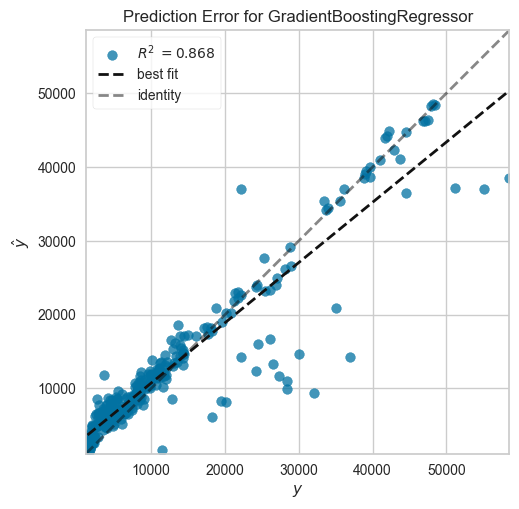

In [61]:
# plotando matriz de confusão
plot_model(tuned_gbr, plot='error')

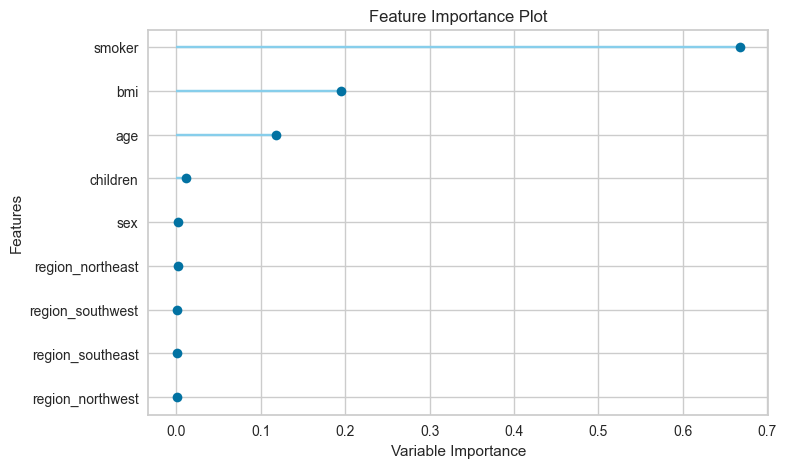

In [62]:
# feature importances
plot_model(tuned_gbr, plot='feature')

# Evaluation

### Avaliação Interativa do Modelo

In [63]:
# avaliando o modelo
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [64]:
# fazendo previsões
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2499.8542,20017640.5123,4474.1078,0.8678,0.4098,0.3390


In [65]:
# finalizando o modelo
final_gbr = finalize_model(tuned_gbr)

acima ele usará todos os dados fornecidos ao PyCaret, ao qual ela tinha subdividido em treino e teste

In [66]:
type(final_gbr)

pycaret.internal.pipeline.Pipeline

In [68]:
# analisando a mudança nos resultados
pred_holdout = predict_model(final_gbr, data=train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2006.2090,13113912.3853,3621.3136,0.9111,0.3142,0.2262


In [69]:
# verificando os parâmetros
print(final_gbr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                      

### Prevendo em novos dados


In [70]:
# previsão em dados não vistos
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2471.3609,20580580.9918,4536.5825,0.8572,0.4402,0.2703


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,32.900002,0,no,southwest,1748.774048,1931.445211
1,58,female,32.965000,0,no,northeast,12430.953125,12689.991488
2,33,female,24.309999,0,no,southeast,4185.097656,6832.879417
3,60,male,28.900000,0,no,southwest,12146.970703,13737.876024
4,27,female,24.100000,0,no,southwest,2974.125977,6270.700823


### Salvando o modelo

# salvando o modelo


In [ ]:
save_model(final_gbr,'Modelo_Final_026_02_25')

### Carregando um modelo

In [73]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_Final_026_02_25')

Transformation Pipeline and Model Successfully Loaded


### fazendo novas previsões com o modelo salvo

In [74]:
# fazendo previsões com o modelo salvo
new_prediction = predict_model(saved_final_gbr, data=test)
new_prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2471.3609,20580580.9918,4536.5825,0.8572,0.4402,0.2703


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,32.900002,0,no,southwest,1748.774048,1931.445211
1,58,female,32.965000,0,no,northeast,12430.953125,12689.991488
2,33,female,24.309999,0,no,southeast,4185.097656,6832.879417
3,60,male,28.900000,0,no,southwest,12146.970703,13737.876024
4,27,female,24.100000,0,no,southwest,2974.125977,6270.700823
